In [1]:
cd /Users/atreyamisra/Google \Drive/Downloads/nn_compsensing/tfupgraded_src/

/Users/atreyamisra/Google Drive/Downloads/nn_compsensing/tfupgraded_src


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import dcgan_model
import dcgan_utils
import dcgan_ops
import celebA_estimators
import scipy.ndimage

Number 2 Starts Here:

In [3]:
# define the graph
sess = tf.Session()
z = tf.placeholder(tf.float32, shape=[1, 100], name = 'z')
x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess)

In [4]:
# load variables
restorer = tf.train.Saver(var_list=restore_dict)
restorer.restore(sess, restore_path)

In [5]:
# generate images
s=(1,100)
s=np.zeros(s)
s[0,0]=1
feed_dict = {z : s}
x_hat_val = sess.run(x_hat, feed_dict=feed_dict)

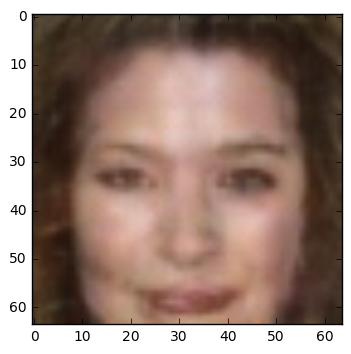

In [6]:
# inspect
im_idx = 0
plt.imshow(dcgan_utils.inverse_transform(x_hat_val[im_idx, :]))

In [7]:
sess2 = tf.Session()

train_a=tf.train.GradientDescentOptimizer(.01)
with tf.variable_scope(tf.get_variable_scope(),reuse=False) as scope:
    actual=tf.placeholder(tf.float32,shape=[1,64,64,3],name="actual")
    
    z=tf.get_variable(name="z", initializer=tf.random_uniform_initializer(minval=1,maxval=1,dtype=tf.float32), shape=[1, 100])
    with tf.variable_scope("inner"):
        x_hat, restore_dict, restore_path = celebA_estimators.dcgan_gen(z, sess2)
    
    error=tf.square(tf.norm(dcgan_utils.inverse_transform(x_hat)-actual))
    print(error.name)
    train_a=train_a.minimize(error)    


model = tf.global_variables_initializer()
sess2.run(model)


pic=scipy.ndimage.imread("/Users/atreyamisra/Downloads/pic.jpeg")

pic=pic[np.newaxis,...]

for x in range(0,100):
    sess2.run(train_a,feed_dict={actual:pic})
    if x%10==0:
        print(x)

z_New=sess2.run(z)

Square:0
0
10
20
30
40
50
60
70
80
90


227614681.263


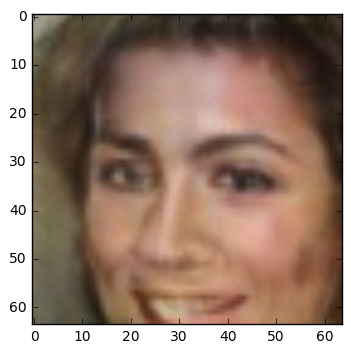

[[ 0.50392145  0.43262935  0.67362893  0.5648942   0.60290754  0.4484877
   0.41939151  0.5690136   0.50045866  0.64920408  0.35064048  0.78741431
   0.62337834  0.95232099  0.84809983  0.6445446   0.60164869  0.51253772
   0.67898995  0.58389914  0.75943357  0.6153965   0.85321659  0.36342353
   0.75033081  0.40288967  0.77433062  0.49101508  0.53196871  0.41270614
   0.64683199  0.65432417  0.79024076  0.5808109   0.6018852   0.49686176
   0.52935731  0.7753039   0.43941736  0.70933986  0.53984267  0.7962293
   0.45341861  0.45468098  0.65629441  0.66088223  0.53818184  0.5158267
   0.49212241  0.61025441  0.42530787  0.71177387  0.77178723  0.49269974
   0.60935128  0.51378495  0.67624378  0.38421929  0.81539047  0.73118639
   0.53728467  0.52594703  0.7130444   0.64885026  0.57341421  0.58381581
   0.52977371  0.6471132   0.67416704  0.56024158  0.64047563  0.57543993
   0.34834093  0.6741423   0.48419487  0.62071693  0.43072975  0.76805079
   0.87478757  0.5559932   0.93367547  0.

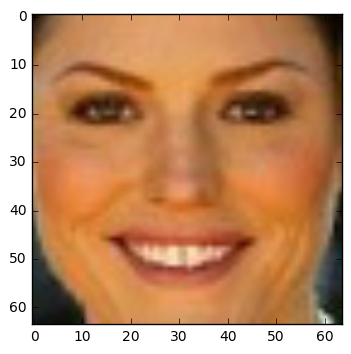

In [8]:
z_New=sess2.run(z)

z_New_Tensor=tf.placeholder(tf.float32,[1,100])

x_hat2, restore_dict2, restore_path2 = celebA_estimators.dcgan_gen(z_New_Tensor, sess2)


restorer2 = tf.train.Saver(var_list=restore_dict2)
restorer2.restore(sess2, restore_path2)

x_hat_val2 = sess2.run(x_hat2, feed_dict={z_New_Tensor:z_New})

for x in range(0,1):
    print(np.linalg.norm(dcgan_utils.inverse_transform(x_hat_val2[x])-pic[x])**2)
plt.imshow(dcgan_utils.inverse_transform(x_hat_val2[0]))
plt.show()
print(z_New)
plt.imshow(pic[0])
plt.show()

In [9]:
sess.close()
sess2.close()